# Introduction

In Part I, we collected and harmonized our data. If you have noticed the data was not exactly clean since we were working with different years' data. As such, in this Part, we are going to do some data cleaning. 

In this notebook, you will do the following:
1. Import the pandas library
2. Check for missing values
3. Check for each column's unique values
4. Fix unevenly cased columns
5. Strip text from numbers
6. Export the cleaned DataFrame as a CSV

### Step 1: Import the following library
- pandas

In [2]:
# Step 1: import your library
import pandas as pd

### Step 2: Read the CSV you exported in Part I
Don't be alarmed by any warning that comes up - that's caused by "remaining_lease" column having both integers and strings.

In [168]:
# Step 2: load the combined CSV
raw_df = pd.read_csv('part1_result.csv')

### Time to clean! 
It is popularly said that 80% of a data scientist's job is spent on data cleaning. Sounds ridiculous, but that's what happens in out there when you work with real datasets. Fortunately, the data that we have here isn't that bad so we won't spend 80% of our time here cleaning. 

In data cleaning, we're looking for a few things:
1. Missing values
2. Inconsistent data types within a column
3. Inconsistent casing in a column, e.g., one row contains "DATA" then other row contains "data"
4. Values that are supposed to be one type but happen to be another, e.g., "01" (string) vs 1 (integer) 

### Step 3: Count total missing values in columns
We'll see if we're missing any data in any of the columns. If need be, we'll remove those problematic rows.

<strong>Hint: Google "count missing values in pandas"</strong>

In [169]:
# Step 3: Sum up the total number of missing values (NA) in each column
missing_values_count = raw_df.isnull().sum() 
missing_values_count

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
real_month             0
remaining_lease        0
dtype: int64

Now that we've got missing data inspection out of the way, it's time to examine the various columns. From here on, we will be getting the frequency counts of the various columns containing categorical table.

Counting frequency is useful for two reasons:
1. You can develop an intuition around the distribution of the values in the column
2. You can identify the unique categorical values in the column, and it's one of the ways you can detect case inconsistencies since different cases of the same word will be distinguished, e.g., "Data" and "data" are counted separately

### Step 4: Get the frequency counts of 'town'
We'll go through each column, starting with "town".

In [170]:
# Step 4: Get the frequency counts of "town"
raw_df.groupby('town').count()

,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,real_month,remaining_lease
town,,,,,,,,,,,,
ANG MO KIO,48322,48322,48322,48322,48322,48322,48322,48322,48322,48322,48322,48322
BEDOK,61533,61533,61533,61533,61533,61533,61533,61533,61533,61533,61533,61533
BISHAN,19573,19573,19573,19573,19573,19573,19573,19573,19573,19573,19573,19573
BUKIT BATOK,40510,40510,40510,40510,40510,40510,40510,40510,40510,40510,40510,40510
BUKIT MERAH,30615,30615,30615,30615,30615,30615,30615,30615,30615,30615,30615,30615
BUKIT PANJANG,24360,24360,24360,24360,24360,24360,24360,24360,24360,24360,24360,24360
BUKIT TIMAH,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289
CENTRAL AREA,6370,6370,6370,6370,6370,6370,6370,6370,6370,6370,6370,6370
CHOA CHU KANG,33470,33470,33470,33470,33470,33470,33470,33470,33470,33470,33470,33470


Looks like nothing is awry here. 

### Step 5: Get the frequency counts of 'flat_type'
The "town" column should be fine, so let's move on to 'flat_type'.

In [171]:
# Step 5: Get the frequency counts of "flat_type"
raw_df.groupby('flat_type')['flat_type'].count()

flat_type
1 ROOM                1273
2 ROOM                9904
3 ROOM              273083
4 ROOM              310320
5 ROOM              171049
EXECUTIVE            62874
MULTI GENERATION       279
MULTI-GENERATION       226
Name: flat_type, dtype: int64

Wait a minute.

The 'flat_type' corner seems mostly well-behaved, except for "MULTI-GENERATION" and "MULTI GENERATION". You will need to replace "MULTI-GENERATION" with "MULTI GENERATION" in the column.

<strong>Hint: Google "replace string in column pandas"</strong>

### Step 6: Replace "MULTI-GENERATION" with "MULTI GENERATION"

In [172]:
# Step 6a: Replace "MULTI-GENERATION" with "MULTI GENERATION"
raw_df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION', inplace=True)

In [173]:
# Step 6b: Get the frequency counts of "flat_type" again after replacing the string in the column
raw_df.groupby('flat_type')['flat_type'].count()

flat_type
1 ROOM                1273
2 ROOM                9904
3 ROOM              273083
4 ROOM              310320
5 ROOM              171049
EXECUTIVE            62874
MULTI GENERATION       505
Name: flat_type, dtype: int64

### Step 7: Get the frequency counts of 'flat_model'
Similarly let's check "flat_model" column! 

In [174]:
# Step 7: Get the frequency counts of "flat_model"
raw_df.groupby('flat_model')['flat_model'].count()

flat_model
2-ROOM                        21
2-room                        19
APARTMENT                   9901
Adjoined flat               1090
Apartment                  22211
DBSS                        1679
IMPROVED                   73593
IMPROVED-MAISONETTE           44
Improved                  144370
Improved-Maisonette           70
MAISONETTE                 12215
MODEL A                    70381
MODEL A-MAISONETTE           982
MULTI GENERATION             279
Maisonette                 14798
Model A                   158789
Model A-Maisonette           908
Model A2                    9128
Multi Generation             226
NEW GENERATION             78898
New Generation             98956
PREMIUM APARTMENT              6
Premium Apartment          35328
Premium Apartment Loft        34
Premium Maisonette            82
SIMPLIFIED                 23258
STANDARD                   17375
Simplified                 30778
Standard                   22541
TERRACE                      247

The problem that this column suffers from is that the casing of the same words are different, e.g., "Model A" vs "MODEL A" which leads to a separate count.

### Step 8: Manipulate the casing of the values in the 'flat_model' column
More specifically, since most of the things are in upper cases, let's turn everything in the 'flat_model' column to be upper case. 

<strong>Hint: Google "uppercase column pandas" for a one-line solution</strong>

In [175]:
# Step 8a: Turn everything in "flat_model" to be in uppercase
raw_df['flat_model'] = raw_df['flat_model'].str.upper()

In [176]:
# Step 8b: Get the frequency counts of "flat_model" again to see if you fixed the problem
raw_df.groupby('flat_model')['flat_model'].count()

flat_model
2-ROOM                        40
ADJOINED FLAT               1090
APARTMENT                  32112
DBSS                        1679
IMPROVED                  217963
IMPROVED-MAISONETTE          114
MAISONETTE                 27013
MODEL A                   229170
MODEL A-MAISONETTE          1890
MODEL A2                    9128
MULTI GENERATION             505
NEW GENERATION            177854
PREMIUM APARTMENT          35334
PREMIUM APARTMENT LOFT        34
PREMIUM MAISONETTE            82
SIMPLIFIED                 54036
STANDARD                   39916
TERRACE                      643
TYPE S1                      274
TYPE S2                      131
Name: flat_model, dtype: int64

### Step 9: Examine "remaining_lease"
If you noticed from Part I, there is one major issue in this particular column. There are only integers in the CSVs from earlier years and strings in the later ones, e.g., 64 years 04 months. 

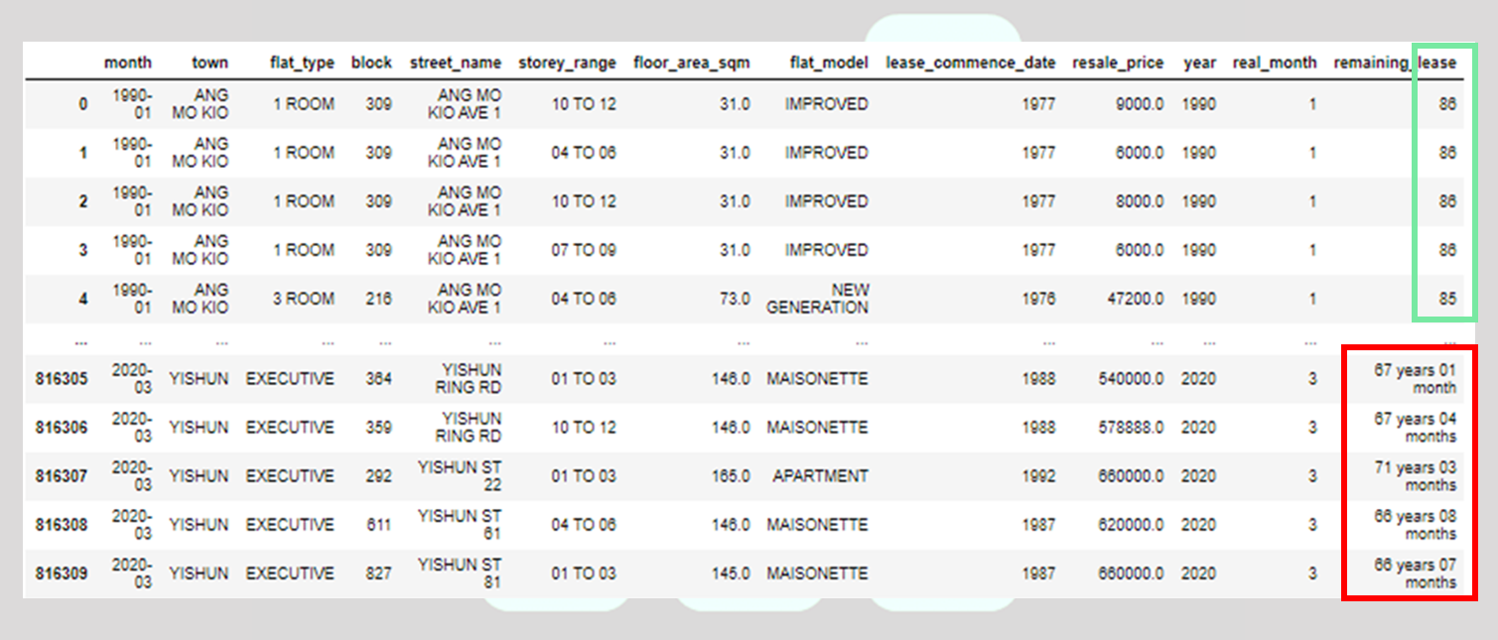

Before we decide on anything, let's sample the column data few times just to see if we can detect any patterns

To do that, let's <strong>sample</strong> anywhere between 10-50 items in the "remaining_lease" column.

In [177]:
# Step 9: Sample values from the "remaining_lease" column - do it a few times so you can see the variety of values
raw_df['remaining_lease'].sample(20)

78404                     91
45323                     83
700196                    80
128114                    77
269197                    85
606327                    68
285354                    79
752283    61 years 03 months
584916                    82
816727    74 years 11 months
649730                    64
664367                    56
607780                    86
483570                    95
570842                    76
4560                      93
752064    79 years 06 months
640824                    60
468091                    72
811735    91 years 11 months
Name: remaining_lease, dtype: object

### Step 10: Remove strings from "remaining_lease"
Notice something? The "bad" strings have the same format so this will make cleaning easier.

We'll need to remove "years XX months", i.e. just keep the first three string characters at the front.

There are at least two ways to do this:
1. use the built-in methods of Series to do string slicing, followed by turning all of the sliced string into integers
2. use a for loop with a nested try-except conditional to turn the strings into int, or split the string by "year" and only taking the first item in the split list
3. be creative! 

<strong>Hint: If you choose to do 1, make sure you slice correctly. We know that the leases are 99 years long, but make sure you don't take what we said for granted. If you slice your strings too carelessly, you may end up a situation where you get 10 in "remaining_lease" when you're supposed to get 100.</strong>

<strong>Hint 2: To make life easier, just slice the first three characters in your string</strong>

<strong>Hint 3: Don't forget to turn everything in the column into a string first before slicing - otherwise you'll encounter an error with the ints</strong>

In [178]:
# Step 10: Remove strings from "remaining_lease"
def split_string_dates(df,col,delim):
    temp_list = []
    for s in df[col]:
        if type(s) != int:
            a = s.split(delim)
            b = a[0].strip()
            temp_list.append(pd.to_numeric(b))
        else:
            temp_list.append(s)
    return temp_list

In [179]:
raw_df['remaining_lease'] = split_string_dates(raw_df,'remaining_lease', 'years')

In [182]:
raw_df['remaining_lease'].sample(5)

307825    84
487777    67
504223    93
79910     94
248067    88
Name: remaining_lease, dtype: int64

### Step 10 Optional: Try this if you're really stuck

In [ ]:
# Step 10 optional: Remove strings from "remaining_lease" with splits
# declare a variable containing an empty list

# use a for loop to go through "remaining_lease"

    # start with a try conditional
    
        # declare a variable that is the int of the current value in the for loop
        
        # append the list that you declared on top with the int version of your value
        
    # declare an except, in case you're working with a string and the int function raises an error
    
        # split your value by "years" and store the list in a variable
        
        # get only the first item in the list containing the split string and use the int function
        
        # append the list that you declared on top with that int first item
        

# set the "remaining_lease" column in the DataFrame with the list that is now populated with the cleaned data

# check your DataFrame


### Step 10 Optional 2
Alternatively, drop us a post at our <a href = "https://www.facebook.com/UpLevelSG">Facebook page</a> if you're really really really stuck. 

But real growth comes from struggling! It's like a butterfly emerging from its coccoon - that is like <em>the</em> struggle.

Good luck!

### Step 11: Verify your conversion by sampling the DataFrame (not only the column)
Make sure the converstion is correct, and the numbers between 'lease_commence_date', 'year', and 'remaining_lease' tally.

In addition, get the minimum number in your 'remaining_lease' column. If the minimum is 10, you have truncated the string wrongly. 

We hope you remembered the equation from Part I.

In [187]:
# Step 11a: Check your "remaining_lease" conversion by sampling your DataFrame a few times
raw_df[['year','lease_commence_date','remaining_lease']].sample(5)

,year,lease_commence_date,remaining_lease
271006,1999,1986,86
822049,2020,2006,84
8414,1990,1967,76
293943,2000,1984,83
245913,1999,1977,77


In [188]:
# Step 11b: Get the minimum value in the remaining_lease column
raw_df['remaining_lease'].min()

45

### Step 12: Get the frequency counts of 'street_name'
Hard part's over, we promise you. Take a look at the 'street_name' column

In [190]:
# Step 12: Get frequency count of 'street_name'
raw_df.groupby('street_name')['street_name'].count()

street_name
ADMIRALTY DR      2043
ADMIRALTY LINK    1273
AH HOOD RD         164
ALEXANDRA RD        63
ALJUNIED CRES     2179
                  ... 
YUNG KUANG RD      400
YUNG LOH RD        277
YUNG PING RD       485
YUNG SHENG RD      333
ZION RD            344
Name: street_name, Length: 569, dtype: int64

Nothing out of the ordinary, so let's leave this column alone.

### Step 13: Get frequency counts of 'storey_range'
Okay, last column - 'storey_range'. To protect the privacy of the seller of the unit, a range of floors were given instead. Let's see if the frequency count gives anything weird. 

In [191]:
# Step 13: Get frequency counts of 'storey_range'
raw_df.groupby('storey_range')['storey_range'].count()

storey_range
01 TO 03    169412
01 TO 05      2700
04 TO 06    210281
06 TO 10      2474
07 TO 09    189626
10 TO 12    160667
11 TO 15      1259
13 TO 15     52432
16 TO 18     19561
16 TO 20       265
19 TO 21      9477
21 TO 25        92
22 TO 24      6089
25 TO 27      2565
26 TO 30        39
28 TO 30      1065
31 TO 33       273
31 TO 35         2
34 TO 36       273
36 TO 40         7
37 TO 39       260
40 TO 42       137
43 TO 45        18
46 TO 48        25
49 TO 51         9
Name: storey_range, dtype: int64

Again, nothing out of the ordinary. This is awesome! 

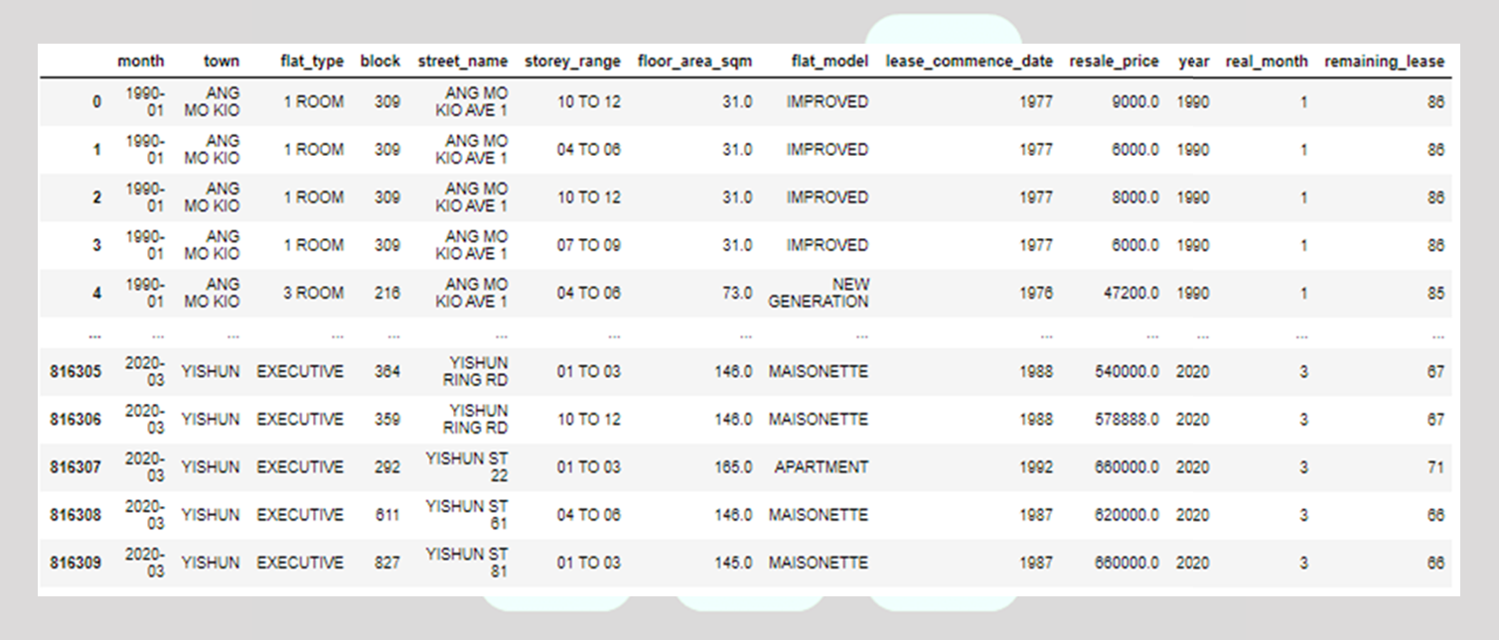

Your DataFrame should look something like this in the end.
1. 'flat_type' casing is consistent
2. 'flat_model' casing is consistent
3. 'remaining_lease' contains integers only

### Step 14: Export the cleaned DataFrame as CSV
What a journey so far! This was challenging, but I hope you made it through. We are going to export our cleaned DataFrame as a CSV for Part III.

In [193]:
# Step 14: Export DataFrame as CSV
raw_df.to_csv('part2_result.csv',index=False)